In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

1081

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [8]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.cblof import CBLOF
from pyod.models.pca import PCA
from pyod.models.loda import LODA


In [9]:
def outliers(x):
    a={}
    algorithms = [ABOD(), KNN(n_jobs=-1),CBLOF(),PCA(),LODA()]
    for algorithm in algorithms:
            algorithm.fit(x)
            pred=algorithm.predict(x)
            a[algorithm]=pred
    return a 

In [10]:
b=outliers(df.iloc[:,:-1])

C:\Users\Prashanth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
for i in b:
    print(f'The Outlier model is {i}') 
    print(f'The values are {b.get(i)}')
    print('---------------------------------')
    
    

The Outlier model is ABOD(contamination=0.1, method='fast', n_neighbors=5)
The values are [1 0 1 ... 0 0 1]
---------------------------------
The Outlier model is KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
The values are [1 0 1 ... 0 0 1]
---------------------------------
The Outlier model is CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)
The values are [1 1 1 ... 1 1 1]
---------------------------------
The Outlier model is PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)
The values are [0 0 1 ... 0 0 0]
---------------------------------
The Outlier model is LODA(contamination=0.1, n_bins=10, n_rando

In [12]:
df1=pd.DataFrame(b)

In [13]:
df1

,"ABOD(contamination=0.1, method='fast', n_neighbors=5)","KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',\n metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,\n radius=1.0)","CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,\n contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,\n use_weights=False)","PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,\n n_selected_components=None, random_state=None, standardization=True,\n svd_solver='auto', tol=0.0, weighted=True, whiten=False)","LODA(contamination=0.1, n_bins=10, n_random_cuts=100)"
0,1,1,1,0,1
1,0,0,1,0,1
2,1,1,1,1,1
3,0,0,1,0,1
4,0,0,1,0,0
...,...,...,...,...,...
283721,1,0,1,1,0
283722,0,0,1,0,0
283723,0,0,1,0,0
283724,0,0,1,0,0


In [14]:
out=[]
a=df1.mode(axis=1)[0]
for i in range(len(a)):
    if a[i]==1:
        out.append(i)
print(out)

[0, 2, 20, 49, 62, 80, 81, 83, 87, 129, 135, 137, 140, 141, 142, 144, 145, 155, 159, 169, 184, 185, 201, 205, 206, 207, 213, 215, 216, 218, 220, 223, 227, 228, 233, 242, 250, 252, 274, 275, 280, 283, 289, 323, 337, 344, 355, 366, 385, 389, 414, 422, 425, 426, 443, 461, 465, 471, 506, 512, 514, 528, 534, 536, 543, 552, 565, 566, 571, 586, 594, 596, 599, 601, 616, 625, 626, 630, 638, 640, 644, 647, 658, 659, 699, 707, 720, 725, 729, 733, 740, 753, 771, 775, 778, 794, 798, 804, 816, 820, 836, 840, 853, 858, 861, 899, 902, 919, 920, 941, 945, 947, 949, 950, 957, 963, 968, 970, 972, 978, 981, 984, 992, 998, 999, 1002, 1015, 1020, 1024, 1025, 1031, 1037, 1040, 1057, 1066, 1069, 1071, 1072, 1079, 1082, 1095, 1101, 1125, 1147, 1151, 1175, 1195, 1210, 1231, 1236, 1239, 1257, 1259, 1272, 1289, 1291, 1292, 1293, 1310, 1313, 1324, 1337, 1362, 1375, 1377, 1410, 1414, 1435, 1450, 1474, 1477, 1503, 1505, 1509, 1513, 1541, 1555, 1558, 1568, 1573, 1597, 1621, 1630, 1644, 1661, 1662, 1696, 1709, 1734, 1

In [15]:
len(out)

13793

In [17]:
common_indices = df.index.intersection(out)
df = df.drop(index=common_indices, axis=0)


In [18]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
x=df.drop('Class',axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [21]:
y=df['Class']
y

1         0
3         0
4         0
5         0
6         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 269999, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
x,y=SMOTE(n_jobs=-1).fit_resample(df.iloc[:,:-1],df['Class'])

C:\Users\Prashanth\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [24]:
df=pd.DataFrame(x,columns=df.columns)
df['Class']=y

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
1,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
2,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
3,2.000000,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
4,4.000000,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539121,169315.065979,-1.365367,0.986859,-4.240666,1.556908,-1.176496,-1.735856,-0.724149,0.587345,-1.685696,...,0.643269,-0.315737,0.537303,-0.317182,0.505324,0.633696,0.251108,0.124537,340.136621,1
539122,45709.332438,0.246947,0.718104,-0.832974,1.694266,-0.217289,-0.221725,-0.718018,0.433046,-0.215598,...,-0.030945,-0.622988,-0.106682,-0.702059,0.303862,-0.398726,0.158774,0.118852,72.235644,1
539123,29579.616057,1.065741,2.314719,-3.714914,4.089552,1.704687,-1.560528,0.539539,0.030841,-2.028023,...,0.101451,0.108354,-0.263505,-0.319379,0.648402,0.298376,0.108489,0.111285,6.811690,1
539124,28640.820524,-29.477105,16.278379,-30.244384,6.486142,-21.435133,-4.900317,-19.880947,19.341702,-3.610600,...,1.810598,-2.192616,-1.338208,0.173658,2.136807,-0.208629,1.266827,0.367651,99.990000,1


<Axes: >

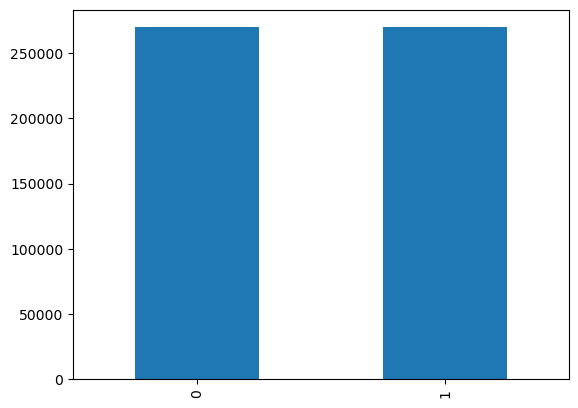

In [26]:
df['Class'].value_counts().plot(kind='bar')

In [27]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.294242,-0.259053,0.187945,-0.222740,0.344964,0.148219,0.285675,-0.232707,0.202631,...,-0.068328,0.155003,0.088390,-0.032387,-0.214728,-0.043126,-0.173876,0.018321,0.020648,-0.139100
V1,0.294242,1.000000,-0.790637,0.884257,-0.613232,0.871604,0.442948,0.873818,-0.412525,0.639097,...,0.001540,0.024891,0.082931,-0.068910,-0.184172,0.027943,-0.011609,0.122155,-0.058572,-0.439197
V2,-0.259053,-0.790637,1.000000,-0.859629,0.676593,-0.799038,-0.426495,-0.827990,0.315579,-0.684871,...,-0.008347,-0.013805,-0.003460,0.013840,0.183372,0.014724,0.009931,0.022064,-0.238720,0.511093
V3,0.187945,0.884257,-0.859629,1.000000,-0.762002,0.852651,0.549568,0.889382,-0.437050,0.737477,...,-0.025204,0.019028,0.070587,0.005863,-0.167734,-0.028857,-0.085582,0.077642,-0.024503,-0.582620
V4,-0.222740,-0.613232,0.676593,-0.762002,1.000000,-0.566368,-0.482331,-0.731583,0.214256,-0.790322,...,0.014815,0.103137,-0.025930,-0.072978,-0.008499,0.139946,0.075466,-0.061208,0.005307,0.736471
V5,0.344964,0.871604,-0.799038,0.852651,-0.566368,1.000000,0.388856,0.846162,-0.480265,0.635737,...,-0.028980,0.019436,0.033128,-0.122182,-0.192086,0.038989,-0.002378,0.113831,-0.115319,-0.375043
V6,0.148219,0.442948,-0.426495,0.549568,-0.482331,0.388856,1.000000,0.420414,-0.545427,0.420439,...,-0.239296,0.198225,0.246194,-0.018199,-0.179986,-0.023519,-0.226669,-0.069112,0.175612,-0.459105
V7,0.285675,0.873818,-0.827990,0.889382,-0.731583,0.846162,0.420414,1.000000,-0.231660,0.770396,...,0.094005,-0.124708,0.047694,-0.047056,-0.030799,-0.012931,0.045897,0.137154,0.111876,-0.509438
V8,-0.232707,-0.412525,0.315579,-0.437050,0.214256,-0.480265,-0.545427,-0.231660,1.000000,-0.201432,...,0.386363,-0.372596,-0.314407,0.081636,0.354572,-0.011456,0.345423,0.046096,-0.006068,0.156055
V9,0.202631,0.639097,-0.684871,0.737477,-0.790322,0.635737,0.420439,0.770396,-0.201432,1.000000,...,0.070013,-0.168091,0.001826,0.003216,-0.026918,-0.129183,-0.006436,0.122693,0.016539,-0.595426


In [28]:
cols=[]
for i in range(len(x.columns)):
    vif= variance_inflation_factor(x.values,i)
    print(f" columns is {x.columns[i]} and VIF is {vif}")
    if vif<10:
        cols.append(x.columns[i])

 columns is Time and VIF is 2.6853645190228366
 columns is V1 and VIF is 12.992612757393848
 columns is V2 and VIF is 19.865241020993228
 columns is V3 and VIF is 23.359967050938195
 columns is V4 and VIF is 9.386059695878979
 columns is V5 and VIF is 25.410613900222614
 columns is V6 and VIF is 3.579608384099606
 columns is V7 and VIF is 52.40691947890416
 columns is V8 and VIF is 5.0855439897477215
 columns is V9 and VIF is 6.316599942751039
 columns is V10 and VIF is 21.50734829224821
 columns is V11 and VIF is 11.608083093139893
 columns is V12 and VIF is 24.020006651193338
 columns is V13 and VIF is 1.1483692743987526
 columns is V14 and VIF is 19.00123932690921
 columns is V15 and VIF is 1.1764889766699627
 columns is V16 and VIF is 23.539630633920112
 columns is V17 and VIF is 30.401002090031543
 columns is V18 and VIF is 12.427790834922297
 columns is V19 and VIF is 2.312776035675406
 columns is V20 and VIF is 3.202738681794964
 columns is V21 and VIF is 2.864054133025234
 colu

In [29]:
df=df[cols]
df['Class']=y

C:\Users\Prashanth\AppData\Local\Temp\ipykernel_1096\487058749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']=y


In [30]:
df

,Time,V4,V6,V8,V9,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.448154,-0.082361,0.085102,-0.255425,0.489095,0.635558,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
1,1.000000,-0.863291,1.247203,0.377436,-1.387024,0.507757,-0.631418,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
2,2.000000,0.403034,0.095921,-0.270533,0.817739,1.345852,0.175121,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
3,2.000000,-0.168252,-0.029728,0.260314,-0.568671,-0.358091,0.517617,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
4,4.000000,1.202613,0.272708,0.081213,0.464960,-0.751063,0.050144,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539121,169315.065979,1.556908,-1.735856,0.587345,-1.685696,-1.003284,0.224588,0.420204,1.070628,0.643269,-0.315737,0.537303,-0.317182,0.505324,0.633696,0.251108,0.124537,340.136621,1
539122,45709.332438,1.694266,-0.221725,0.433046,-0.215598,-1.164527,0.446111,0.210620,0.082205,-0.030945,-0.622988,-0.106682,-0.702059,0.303862,-0.398726,0.158774,0.118852,72.235644,1
539123,29579.616057,4.089552,-1.560528,0.030841,-2.028023,-1.364044,-0.014129,-1.503785,0.010885,0.101451,0.108354,-0.263505,-0.319379,0.648402,0.298376,0.108489,0.111285,6.811690,1
539124,28640.820524,6.486142,-4.900317,19.341702,-3.610600,1.325217,-0.130675,0.634447,1.721727,1.810598,-2.192616,-1.338208,0.173658,2.136807,-0.208629,1.266827,0.367651,99.990000,1


In [31]:
rf=RandomForestClassifier(n_jobs=-1,verbose=2)

In [32]:
rf.fit(df.iloc[:,:-1],y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [33]:
rf.feature_importances_

array([0.02524519, 0.33866021, 0.08002578, 0.03633727, 0.12901812,
       0.01140324, 0.01204163, 0.02513826, 0.02525035, 0.10238927,
       0.0163677 , 0.01636264, 0.02098397, 0.01545713, 0.01307567,
       0.06497239, 0.05122948, 0.01604169])

In [34]:
feat=pd.Series(rf.feature_importances_,index=df.iloc[:,:-1].columns)

In [35]:
feat.sort_values(ascending=False)

V4        0.338660
V9        0.129018
V21       0.102389
V6        0.080026
V27       0.064972
V28       0.051229
V8        0.036337
V20       0.025250
Time      0.025245
V19       0.025138
V24       0.020984
V22       0.016368
V23       0.016363
Amount    0.016042
V25       0.015457
V26       0.013076
V15       0.012042
V13       0.011403
dtype: float64

In [36]:
from sklearn.preprocessing import minmax_scale

In [37]:
x=df.drop('Class',axis=1)
x

,Time,V4,V6,V8,V9,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.448154,-0.082361,0.085102,-0.255425,0.489095,0.635558,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
1,1.000000,-0.863291,1.247203,0.377436,-1.387024,0.507757,-0.631418,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
2,2.000000,0.403034,0.095921,-0.270533,0.817739,1.345852,0.175121,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
3,2.000000,-0.168252,-0.029728,0.260314,-0.568671,-0.358091,0.517617,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000
4,4.000000,1.202613,0.272708,0.081213,0.464960,-0.751063,0.050144,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539121,169315.065979,1.556908,-1.735856,0.587345,-1.685696,-1.003284,0.224588,0.420204,1.070628,0.643269,-0.315737,0.537303,-0.317182,0.505324,0.633696,0.251108,0.124537,340.136621
539122,45709.332438,1.694266,-0.221725,0.433046,-0.215598,-1.164527,0.446111,0.210620,0.082205,-0.030945,-0.622988,-0.106682,-0.702059,0.303862,-0.398726,0.158774,0.118852,72.235644
539123,29579.616057,4.089552,-1.560528,0.030841,-2.028023,-1.364044,-0.014129,-1.503785,0.010885,0.101451,0.108354,-0.263505,-0.319379,0.648402,0.298376,0.108489,0.111285,6.811690
539124,28640.820524,6.486142,-4.900317,19.341702,-3.610600,1.325217,-0.130675,0.634447,1.721727,1.810598,-2.192616,-1.338208,0.173658,2.136807,-0.208629,1.266827,0.367651,99.990000


In [38]:
x=minmax_scale(x)

In [39]:
y=df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
539121    1
539122    1
539123    1
539124    1
539125    1
Name: Class, Length: 539126, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
def model(x,y):
    df1=pd.DataFrame()
    pred=pd.DataFrame()
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
    algorithms={
    'dt': DecisionTreeClassifier(),
    'lg': LogisticRegression(n_jobs=-1,warm_start=True,max_iter=1000,verbose=2),
    'rf': RandomForestClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'ada': AdaBoostClassifier(),
    'bg': BaggingClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'xgboost': XGBClassifier(n_jobs=-1)
    }
    for key, alg in algorithms.items():
        alg.fit(xtrain, ytrain)
        pred[key]= alg.predict(xtest)
        train_pred = alg.predict(xtrain)
        df1.loc[key, 'test'] = accuracy_score(ytest, pred[key])
        df1.loc[key, 'train'] = accuracy_score(ytrain, train_pred)
    return df1,pred,xtrain,xtest,ytrain,ytest
        

In [43]:
acc,pred,xtrain,xtest,ytrain,ytest=model(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   19.7s remaining:   46.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   21.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend Loky

In [44]:
acc

,test,train
dt,0.995771,1.000000
lg,0.922418,0.921956
rf,0.999512,1.000000
ada,0.942042,0.942364
bg,0.998238,0.999939
xgboost,0.999060,0.999865


In [45]:
pred

,dt,lg,rf,ada,bg,xgboost
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
161733,1,1,1,1,1,1
161734,0,0,0,0,0,0
161735,1,1,1,1,1,1
161736,0,0,0,0,0,0


In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
for i in pred.columns:
    print(f'The model name is {i}')
    print(classification_report(ytest,pred[i]))
    print(f'The confusion matrix is {confusion_matrix(ytest,pred[i])}')
    print('------------------------------------------------------')

The model name is dt
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     80795
           1       0.99      1.00      1.00     80943

    accuracy                           1.00    161738
   macro avg       1.00      1.00      1.00    161738
weighted avg       1.00      1.00      1.00    161738

The confusion matrix is [[80288   507]
 [  177 80766]]
------------------------------------------------------
The model name is lg
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     80795
           1       0.94      0.90      0.92     80943

    accuracy                           0.92    161738
   macro avg       0.92      0.92      0.92    161738
weighted avg       0.92      0.92      0.92    161738

The confusion matrix is [[75981  4814]
 [ 7734 73209]]
------------------------------------------------------
The model name is rf
              precision    recall  f1-score   support

        